In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.set_device(0)

In [4]:
import gc

### Bear Detection Using Datablocks API

In [48]:
path = Path('/media/karhd/DATA/bears_imgs/bears')

In [7]:
# creating the datablock
bears = DataBlock(
        blocks=(ImageBlock,CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2,seed=42),
        get_y = parent_label,
        item_tfms=Resize(124))

In [11]:
dls = bears.dataloaders(path)

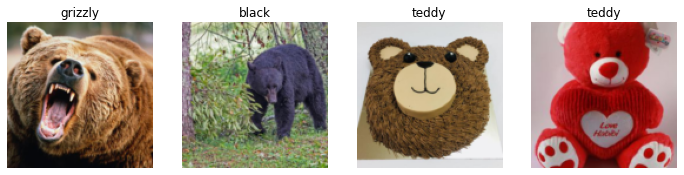

In [12]:
dls.valid.show_batch(max_n=4,nrows=1)

In [26]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

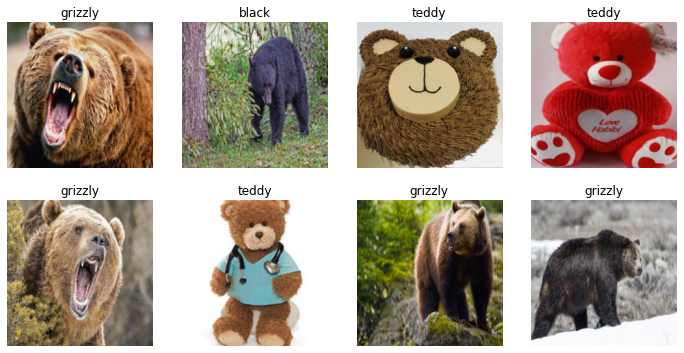

In [28]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8,nrows=2)

###### Creating the Learner

In [32]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)

In [33]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.228081,0.097185,0.046296,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.228087,0.062367,0.037037,00:02
1,0.165443,0.090056,0.037037,00:02
2,0.147120,0.070193,0.027778,00:02
3,0.121653,0.055947,0.027778,00:02


In [34]:
interp = ClassificationInterpretation.from_learner(learn)

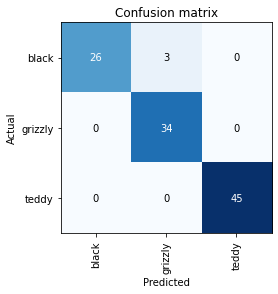

In [35]:
interp.plot_confusion_matrix()

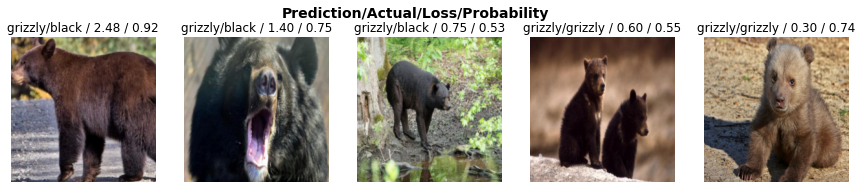

In [37]:
interp.plot_top_losses(5,nrows=1)

###### FROM MODEL TO APP

In [50]:
# saving both the model and the parameters
learn.export(fname=path/'bear_model.pkl')

In [51]:
path.ls(file_exts='.pkl')

(#1) [Path('/media/karhd/DATA/bears_imgs/bears/bear_model.pkl')]

In [52]:
# loading the model for inference
learn_inf = load_learner(path/'bear_model.pkl')

In [54]:
learn_inf.predict(path/'grizzly/00000001.jpg')

('grizzly', tensor(1), tensor([1.6801e-03, 9.9814e-01, 1.8451e-04]))

In [55]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [58]:
img = PILImage.create(btn_upload.data[-1])

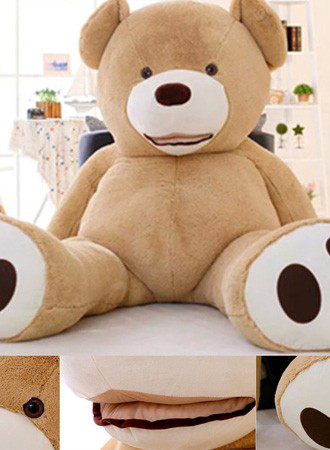

In [59]:
img

In [60]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [61]:
pred,pred_idx,probs = learn_inf.predict(img)

In [65]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [66]:
# button to do classification
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [67]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [68]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [69]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### DOG & CAT BREED DETECTION

In [3]:
path = Path('/media/karhd/DATA/petsData/image_folder/')

In [5]:
dog_cat = DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.2,seed=42),
                   get_y=parent_label,
                   item_tfms=RandomResizedCrop(124,min_scale=0.5),
                   batch_tfms=aug_transforms())

In [6]:
dls = dog_cat.dataloaders(path)

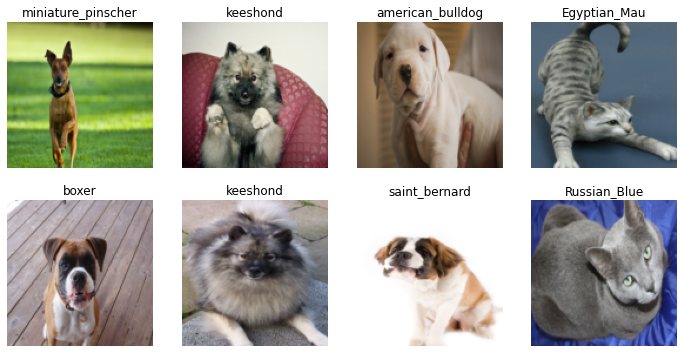

In [7]:
dls.valid.show_batch(max_n=8,nrows=2)

In [11]:
learn = cnn_learner(dls,resnet18,metrics=accuracy)

In [13]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.556915,0.635267,0.813938,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.510012,0.533669,0.841001,00:06
1,0.456171,0.581993,0.820027,00:06
2,0.485239,0.690187,0.803112,00:06
3,0.429579,0.631402,0.824763,00:06
4,0.368249,0.584885,0.841001,00:06
5,0.320173,0.535414,0.849120,00:06
6,0.264120,0.550010,0.842355,00:06
7,0.208559,0.525299,0.853857,00:06
8,0.186442,0.534499,0.851827,00:06
9,0.163068,0.539872,0.851150,00:06


In [15]:
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),batch_tfms=aug_transforms())

In [16]:
dls = dog_cat.dataloaders(path)

In [17]:
learn.dls = dls

In [19]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.117683,0.342199,0.916103,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.112401,0.313690,0.918809,00:13
1,0.092768,0.354930,0.909337,00:13
2,0.127520,0.388179,0.901894,00:13
3,0.140909,0.337595,0.913396,00:13
4,0.110150,0.359681,0.912720,00:13
5,0.092205,0.362886,0.907307,00:13
6,0.071692,0.335972,0.923545,00:13
7,0.053837,0.333889,0.920839,00:13
8,0.051813,0.325700,0.920839,00:13
9,0.041399,0.327159,0.922869,00:13


###### EXPERIMENT WITH INCRESING THE IMAGE SIZE AND SEEING THE EFFECT ON MODEL ACCURACY

In [20]:
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(64,min_scale=0.5),batch_tfms=aug_transforms())

In [21]:
dls = dog_cat.dataloaders(path)

In [22]:
learn = cnn_learner(dls,resnet18,metrics=accuracy)

In [23]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,4.104557,2.857743,0.270636,00:04


epoch,train_loss,valid_loss,accuracy,time
0,3.096167,2.438159,0.342355,00:05
1,2.646709,2.054604,0.426928,00:05
2,2.275810,1.848989,0.472936,00:05
3,1.957840,1.806393,0.507442,00:05
4,1.728215,1.671787,0.520974,00:04
5,1.513033,1.587315,0.546685,00:05
6,1.346625,1.568813,0.555480,00:05
7,1.239605,1.493969,0.575101,00:05
8,1.162777,1.451176,0.578484,00:05
9,1.151966,1.469008,0.578484,00:05


In [24]:
# dobling te image size
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(128,min_scale=0.5),batch_tfms=aug_transforms())
dls = dog_cat.dataloaders(path)

In [25]:
learn.dls = dls

In [26]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.811456,0.675056,0.784168,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.656886,0.572688,0.815291,00:06
1,0.590698,0.540418,0.830853,00:06
2,0.537228,0.584738,0.821380,00:06
3,0.476066,0.518745,0.842355,00:06
4,0.395747,0.552585,0.830176,00:06
5,0.328186,0.486982,0.851827,00:06
6,0.269072,0.497612,0.846414,00:06
7,0.211927,0.469439,0.857916,00:06
8,0.181177,0.469271,0.860622,00:06
9,0.189770,0.472138,0.856563,00:06


In [4]:
# dobling te image size
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(256,min_scale=0.5),batch_tfms=aug_transforms())
dls = dog_cat.dataloaders(path)

NameError: name 'dog_cat' is not defined

In [30]:
learn.dls = dls

In [31]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.289298,0.408878,0.887686,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.193689,0.335949,0.910690,00:15
1,0.182575,0.347882,0.901218,00:15
2,0.167990,0.333293,0.913396,00:15
3,0.164198,0.359534,0.904601,00:15
4,0.128792,0.314952,0.918133,00:15
5,0.104454,0.316741,0.910690,00:15
6,0.077703,0.312806,0.916779,00:15
7,0.063811,0.324239,0.914750,00:15
8,0.056184,0.312877,0.922192,00:15
9,0.051122,0.309912,0.918133,00:15


In [32]:
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(300,min_scale=0.5),batch_tfms=aug_transforms())
dls = dog_cat.dataloaders(path)
learn.dls = dls

In [33]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.064781,0.316994,0.919486,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.064514,0.332098,0.924222,00:23
1,0.111345,0.355180,0.908660,00:23
2,0.113595,0.324447,0.923545,00:22
3,0.076002,0.290868,0.922192,00:23
4,0.052005,0.291458,0.926252,00:23


In [35]:
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(400,min_scale=0.5),batch_tfms=aug_transforms())
dls = dog_cat.dataloaders(path)
learn.dls = dls

In [36]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.099501,0.312950,0.920162,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.084249,0.349323,0.912043,00:37
1,0.122310,0.358164,0.905954,00:37
2,0.105282,0.346846,0.921516,00:37
3,0.074956,0.309497,0.928281,00:37
4,0.057969,0.301597,0.928958,00:37


In [42]:
# saving both the model and the parameters
learn.export(fname=path.parent/'models'/'dog_model_res18.pkl')

###### USING RES50

In [8]:
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(128,min_scale=0.5),batch_tfms=aug_transforms())
dls = dog_cat.dataloaders(path)

In [44]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)

In [50]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.538309,0.677974,0.806495,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.744048,0.512864,0.846414,00:14
1,0.609965,0.585222,0.844384,00:14
2,0.465914,0.441496,0.879567,00:14
3,0.291257,0.395811,0.890392,00:14
4,0.205786,0.386022,0.894452,00:14


In [51]:
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(256,min_scale=0.5),batch_tfms=aug_transforms())
dls = dog_cat.dataloaders(path)

In [52]:
learn.dls = dls

In [53]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.268967,0.337157,0.911367,00:35


epoch,train_loss,valid_loss,accuracy,time
0,0.178749,0.260304,0.922869,00:42
1,0.183260,0.350619,0.897835,00:42
2,0.241348,0.506937,0.887686,00:42
3,0.186716,0.317278,0.918133,00:42
4,0.146501,0.343921,0.920839,00:42
5,0.107698,0.318051,0.917456,00:42
6,0.072849,0.249238,0.939784,00:42
7,0.043757,0.264124,0.935724,00:42
8,0.033938,0.254505,0.938430,00:42
9,0.027181,0.258530,0.939784,00:42


In [57]:
# learn.export(fname=path.parent/'models'/'dog_model_res50.pkl')

In [9]:
learn = load_learner(path.parent/'models'/'dog_model_res50.pkl')

In [11]:
dog_cat= dog_cat.new(item_tfms=RandomResizedCrop(300,min_scale=0.5),batch_tfms=aug_transforms())
dls = dog_cat.dataloaders(path)
learn.dls = dls

In [12]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.041519,0.308926,0.932341,00:52


epoch,train_loss,valid_loss,accuracy,time
0,0.050097,0.354326,0.919486,01:08
1,0.146242,0.378445,0.916103,01:07
2,0.108183,0.356819,0.923545,01:07
3,0.067874,0.259665,0.944520,01:07
4,0.037540,0.257223,0.947226,01:07


In [13]:
# learn.export(fname=path.parent/'models'/'dog_model_res50.pkl')

In [14]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.034807,0.301443,0.936401,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.034198,0.288207,0.941137,01:07
1,0.051694,0.364835,0.921516,01:07
2,0.110913,0.391765,0.914750,01:07
3,0.121622,0.439233,0.903924,01:07
4,0.079879,0.345234,0.920162,01:07
5,0.059145,0.312661,0.931664,01:07
6,0.043277,0.338613,0.929635,01:07
7,0.027399,0.306397,0.933018,01:07
8,0.021792,0.278963,0.937754,01:07
9,0.016739,0.281797,0.938430,01:07


In [18]:
gc.collect()

48335

### CLEAN MESSY ROOM DETECTION

In [5]:
path = Path('/media/karhd/DATA/clean_vs_messy_room_dataset/dataset/')

In [47]:
dog_cat = DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.15,seed=42),
                   get_y=parent_label,
                   item_tfms=RandomResizedCrop(124,min_scale=0.5),
                   batch_tfms=aug_transforms())

In [48]:
def label_func(fname):
    return "clean" if fname.name[0].isupper() else "messy"

In [49]:
clean_messy = DataBlock(blocks=(ImageBlock,CategoryBlock),
                        get_items=get_image_files,
                        splitter = RandomSplitter(valid_pct=0.2,seed=42),
                        get_y= label_func,
                       item_tfms=Resize(224),
                       batch_tfms=aug_transforms())

In [50]:
dls = clean_messy.dataloaders(path)

In [51]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)

In [52]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.178689,0.428319,0.772727,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.659134,0.405654,0.863636,00:01
1,0.542628,0.447024,0.840909,00:01
2,0.452374,0.506293,0.818182,00:01
3,0.371397,0.721165,0.818182,00:01
4,0.322126,0.805556,0.840909,00:01
5,0.274763,0.627860,0.886364,00:01
6,0.237903,0.504784,0.886364,00:01
7,0.206760,0.442169,0.909091,00:01
8,0.180270,0.407679,0.909091,00:01
9,0.159827,0.385798,0.909091,00:01


In [53]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.020015,0.374443,0.909091,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.005946,0.491460,0.909091,00:01
1,0.004008,0.490795,0.886364,00:01
2,0.003708,0.515090,0.909091,00:01
3,0.003810,0.467531,0.931818,00:01
4,0.007737,1.327169,0.818182,00:01
5,0.010855,1.258156,0.840909,00:01
6,0.009645,0.819757,0.863636,00:01
7,0.008982,0.737141,0.886364,00:01
8,0.014001,0.756184,0.886364,00:01
9,0.015676,0.812890,0.863636,00:01


In [55]:
interp = ClassificationInterpretation.from_learner(learn)

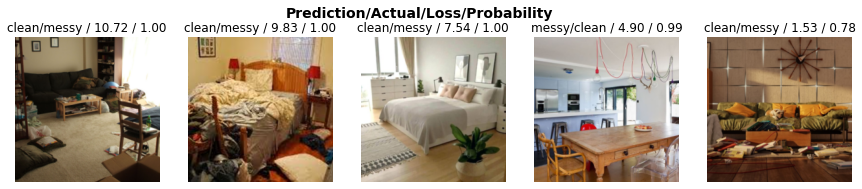

In [56]:
interp.plot_top_losses(5,nrows=1)

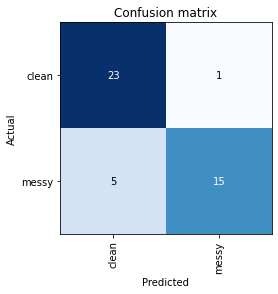

In [58]:
interp.plot_confusion_matrix()